In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
df= pd.read_csv("pd.csv")
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [3]:
df.shape

(195, 24)

In [4]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [6]:
for i in df.columns:
    print("################################################",i,"###########################################")
    print()
    print(set(df[i].tolist()))
    print()

################################################ name ###########################################

{'phon_R01_S34_6', 'phon_R01_S32_1', 'phon_R01_S01_2', 'phon_R01_S06_4', 'phon_R01_S13_3', 'phon_R01_S07_4', 'phon_R01_S16_5', 'phon_R01_S43_3', 'phon_R01_S06_1', 'phon_R01_S20_2', 'phon_R01_S35_6', 'phon_R01_S16_1', 'phon_R01_S44_1', 'phon_R01_S22_3', 'phon_R01_S35_1', 'phon_R01_S04_5', 'phon_R01_S34_2', 'phon_R01_S04_1', 'phon_R01_S07_3', 'phon_R01_S22_5', 'phon_R01_S31_3', 'phon_R01_S16_6', 'phon_R01_S44_4', 'phon_R01_S17_3', 'phon_R01_S35_4', 'phon_R01_S08_2', 'phon_R01_S49_2', 'phon_R01_S24_3', 'phon_R01_S37_3', 'phon_R01_S32_5', 'phon_R01_S21_7', 'phon_R01_S24_6', 'phon_R01_S21_3', 'phon_R01_S02_4', 'phon_R01_S22_1', 'phon_R01_S27_3', 'phon_R01_S02_5', 'phon_R01_S49_4', 'phon_R01_S01_1', 'phon_R01_S24_2', 'phon_R01_S49_1', 'phon_R01_S07_5', 'phon_R01_S18_6', 'phon_R01_S34_3', 'phon_R01_S35_7', 'phon_R01_S21_5', 'phon_R01_S37_5', 'phon_R01_S43_6', 'phon_R01_S39_2', 'phon_R01_S06_3', 

In [7]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


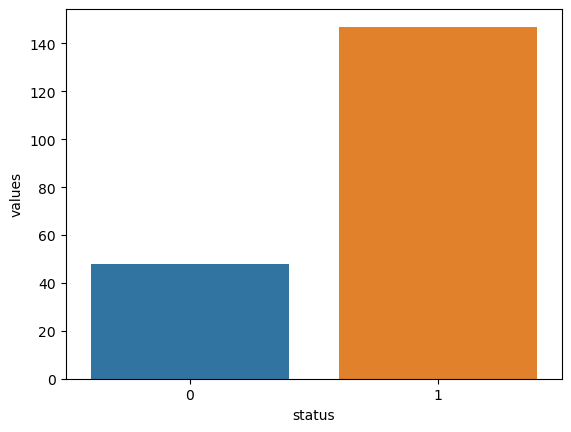

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

temp= df['status'].value_counts()
temp_df= pd.DataFrame({'status':temp.index, 'values':temp.values})
print(sns.barplot(x= 'status', y='values', data=temp_df))

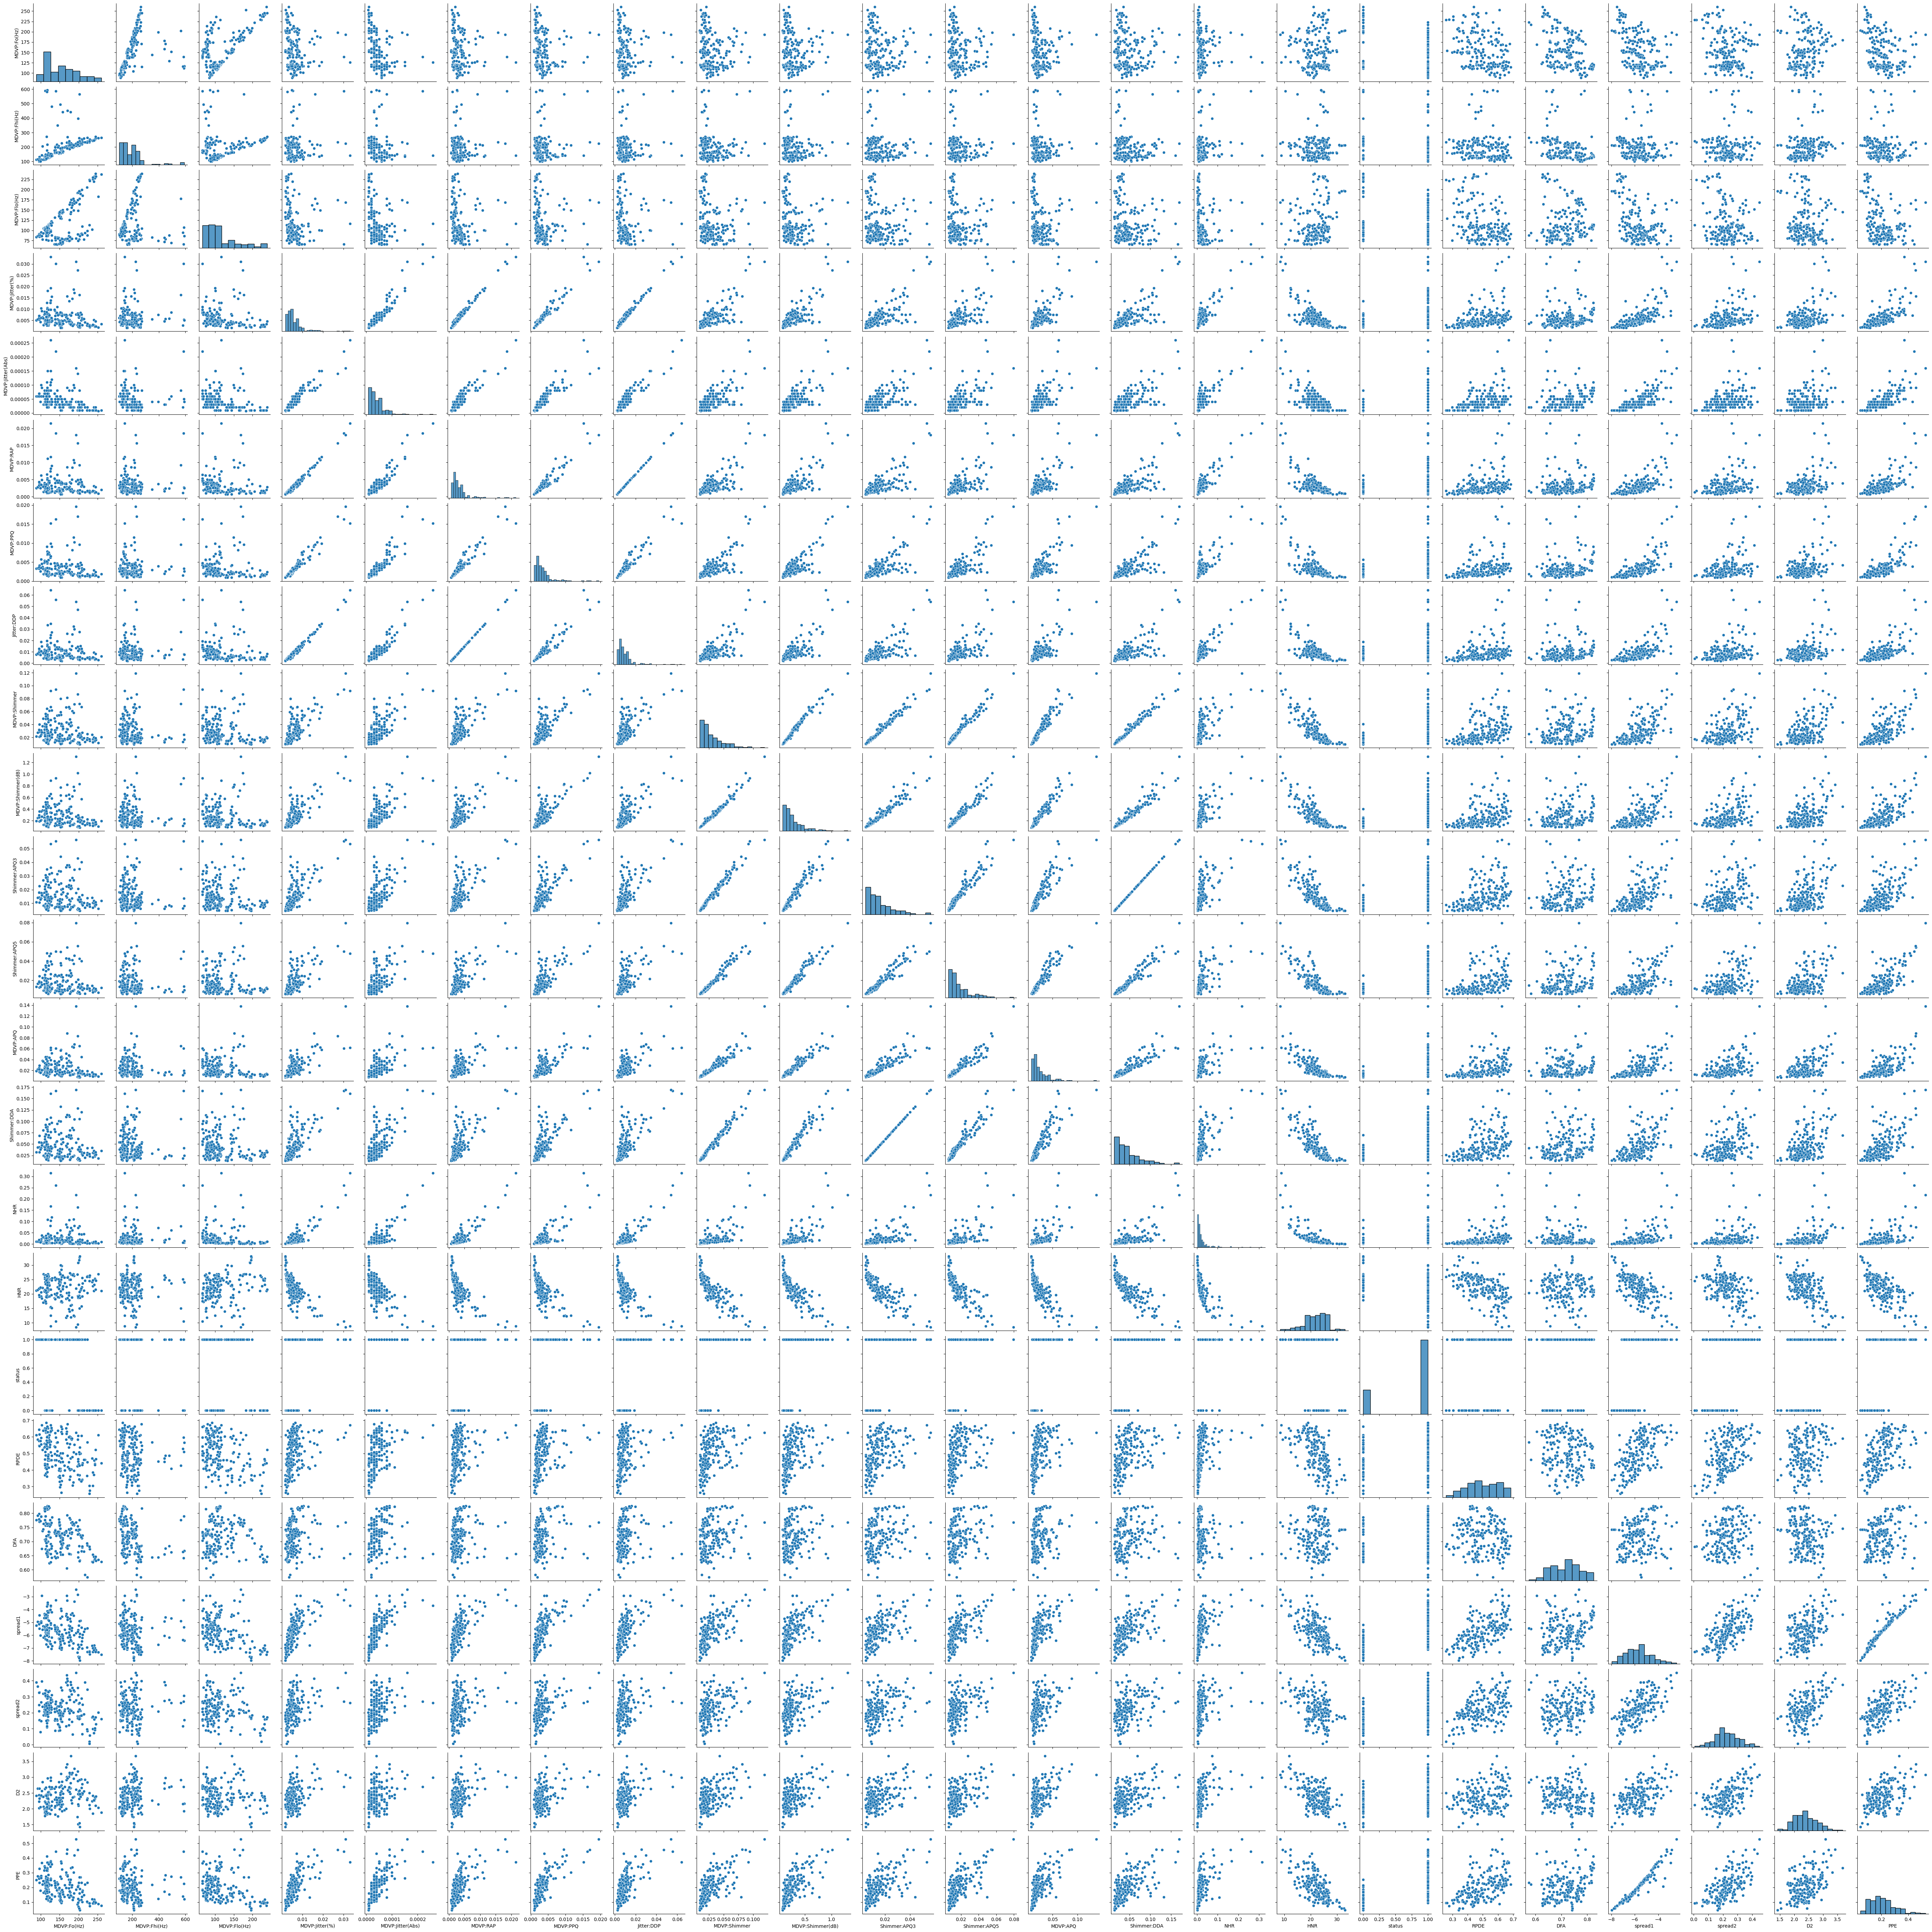

In [9]:
sns.pairplot(df)

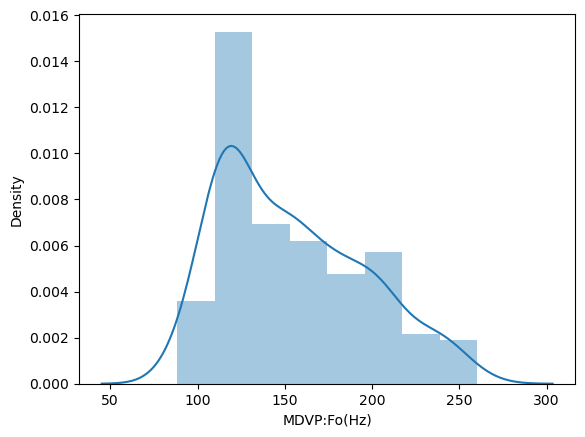

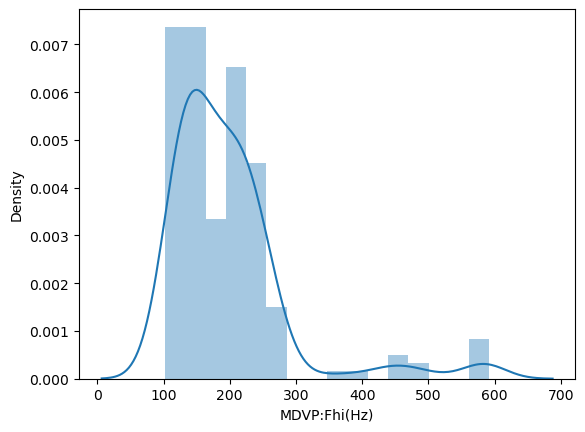

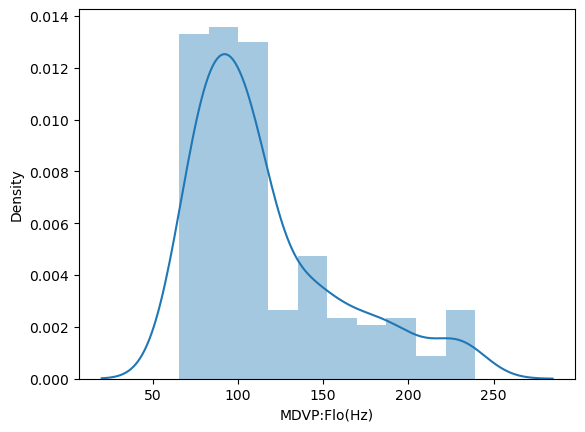

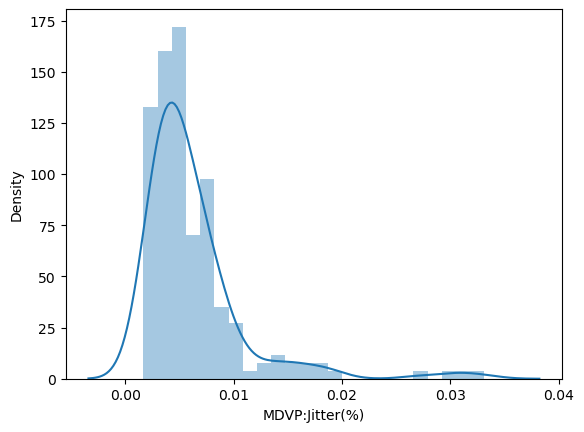

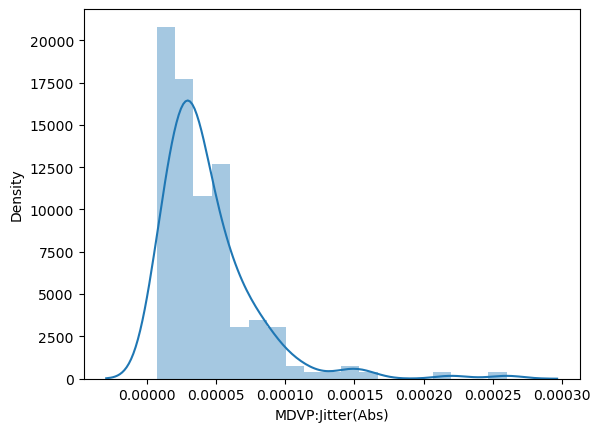

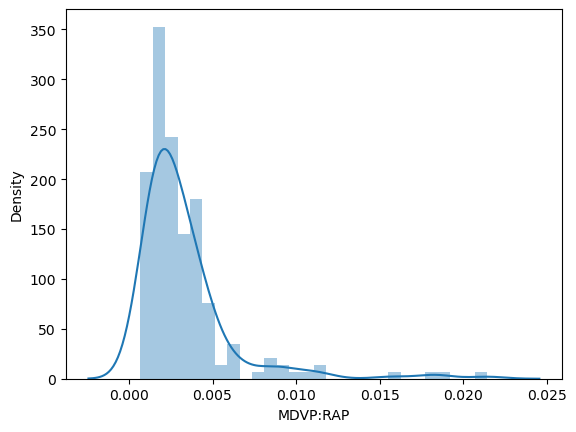

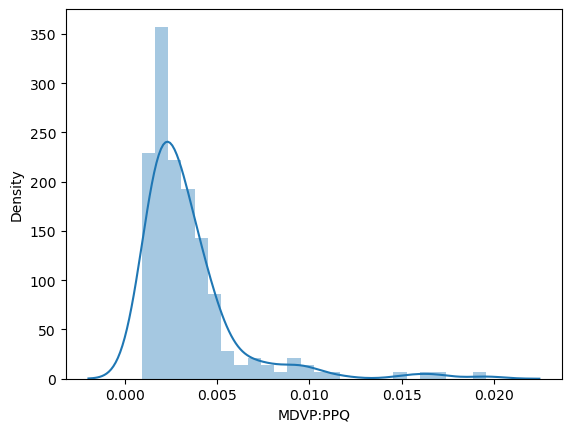

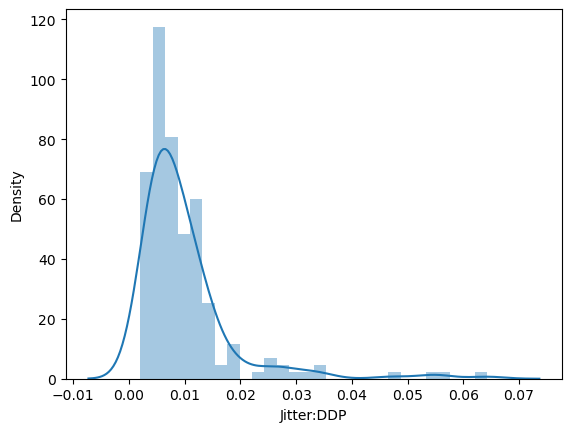

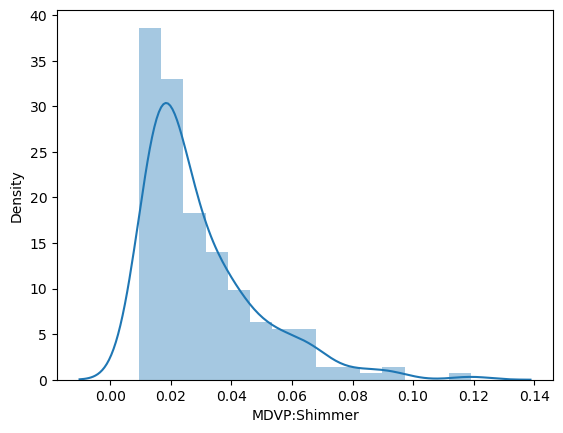

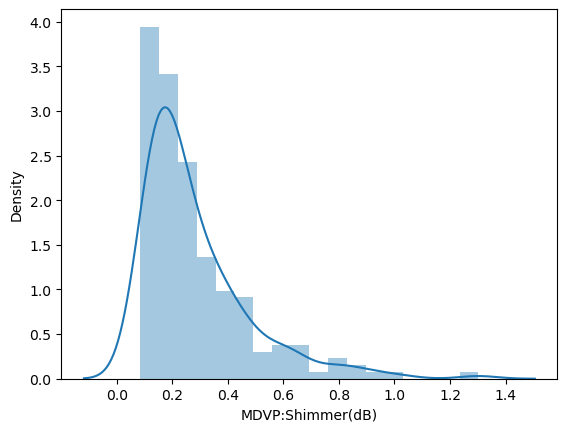

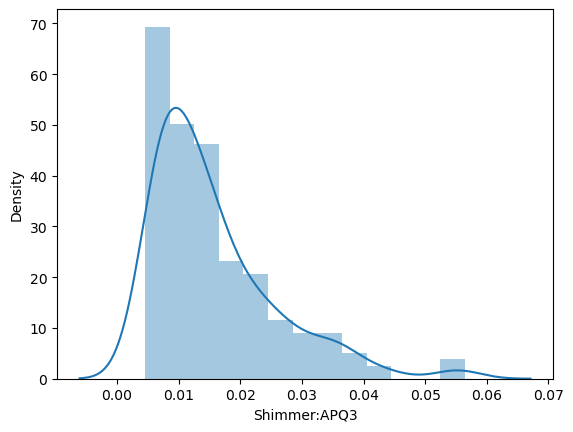

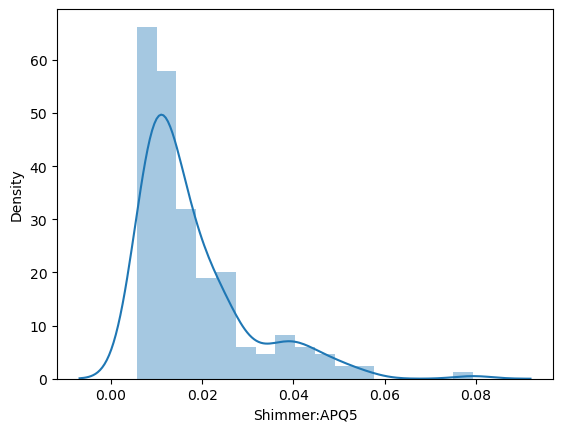

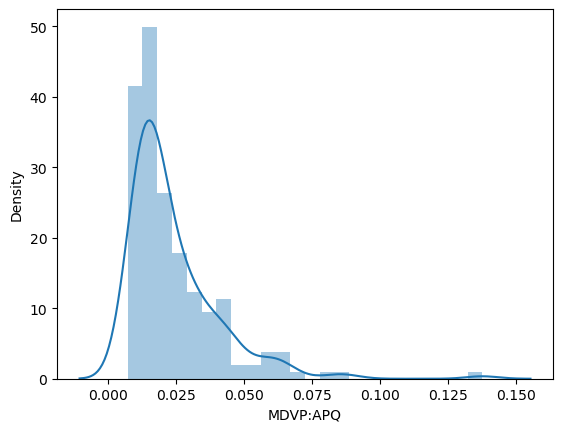

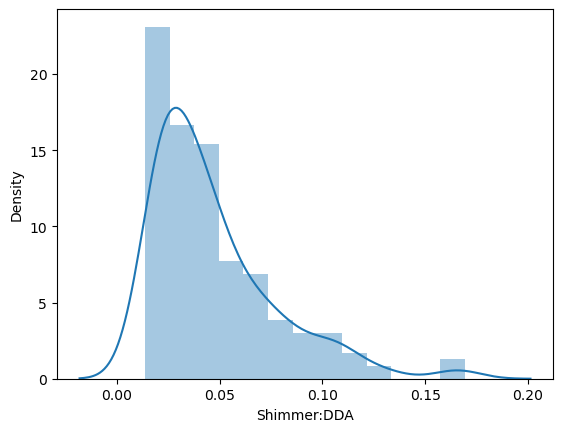

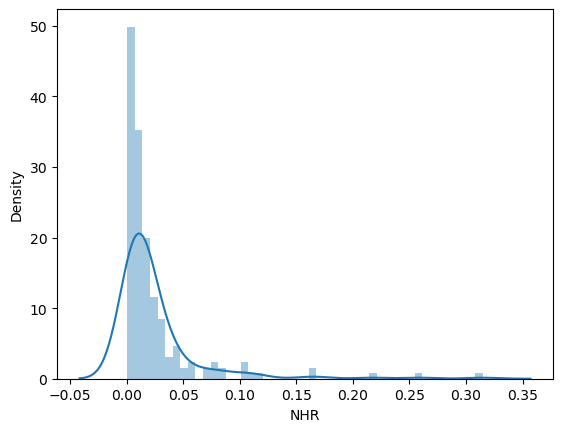

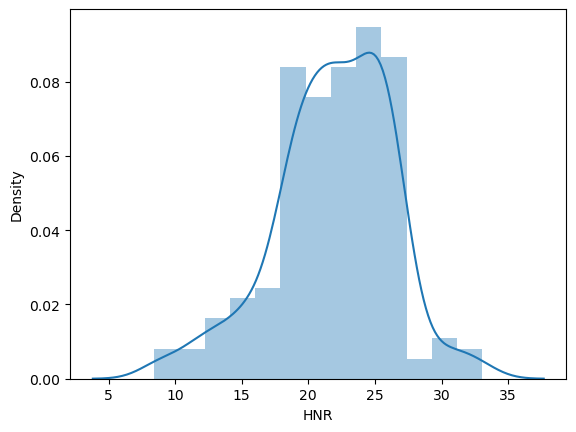

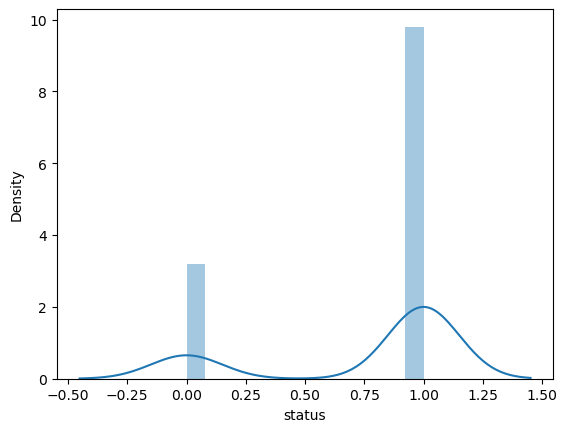

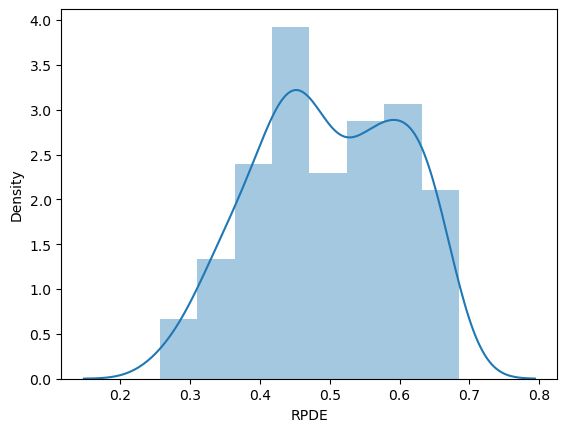

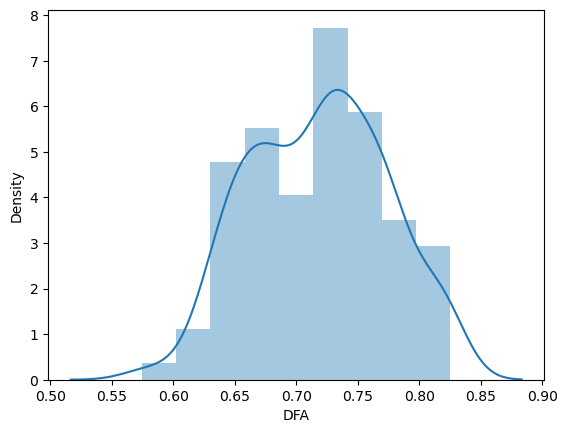

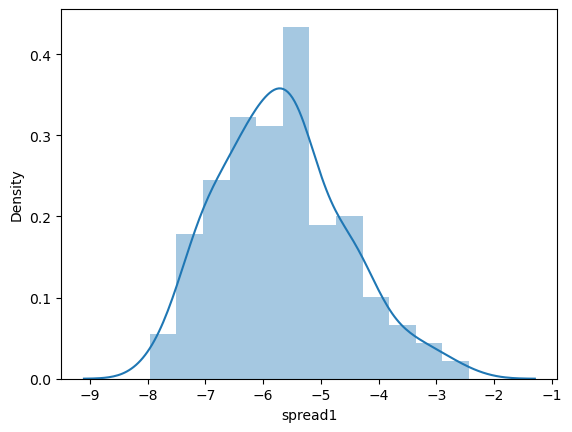

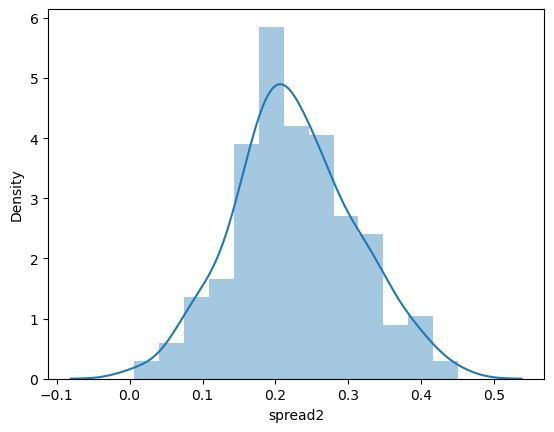

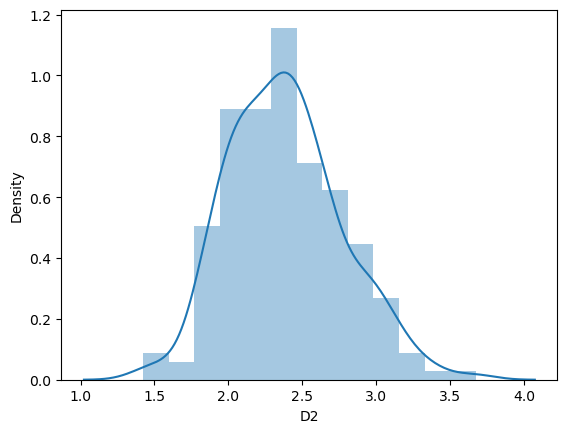

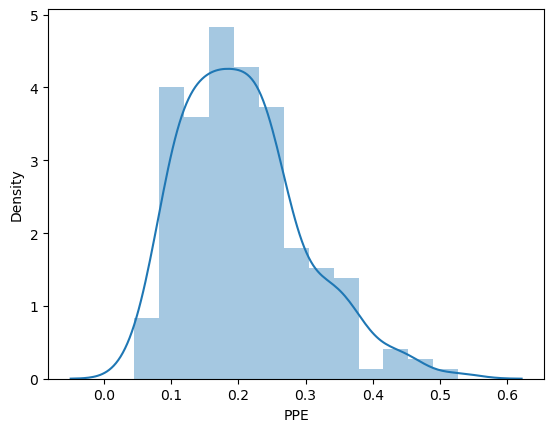

In [10]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    distplots(i)
    
    

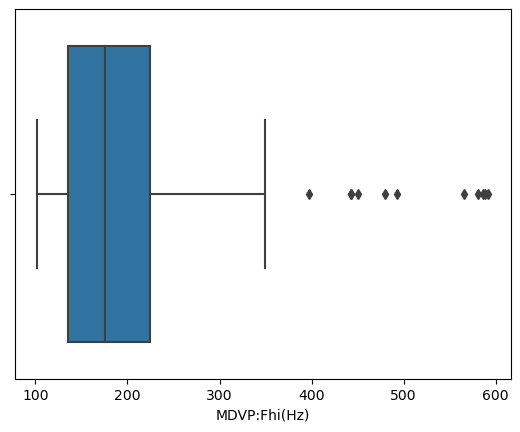

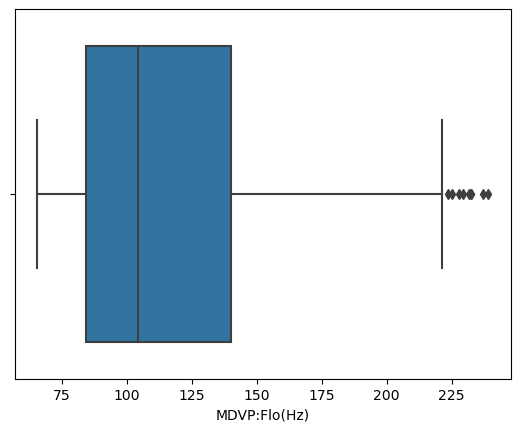

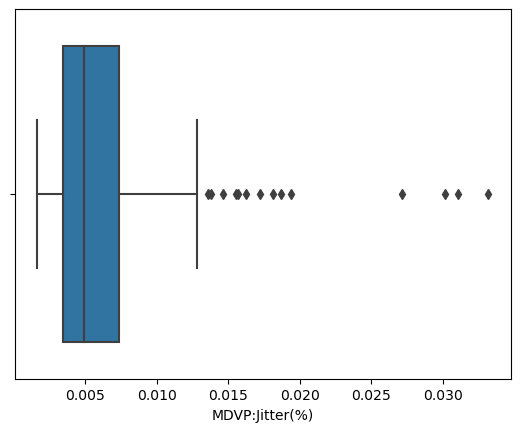

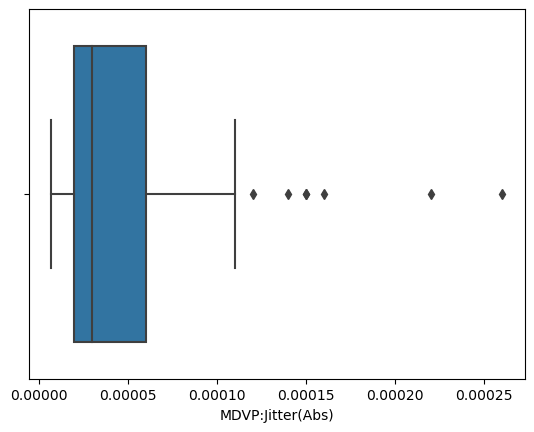

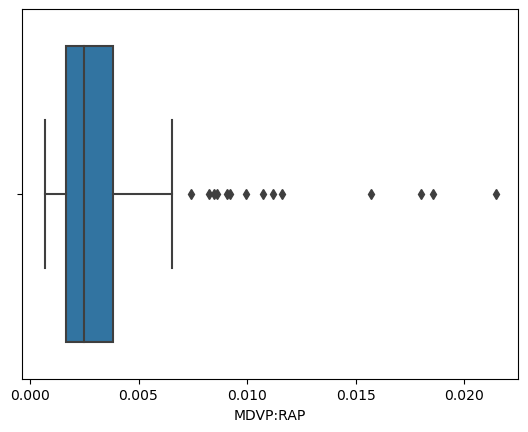

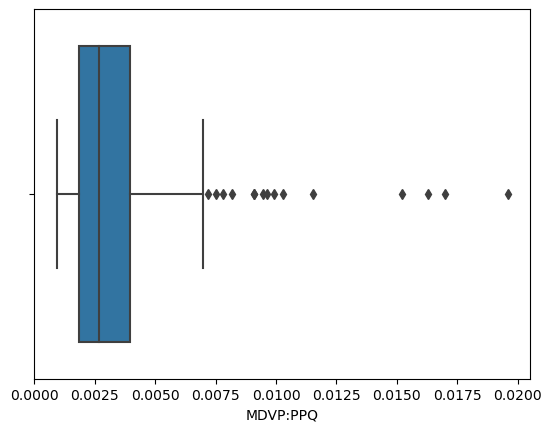

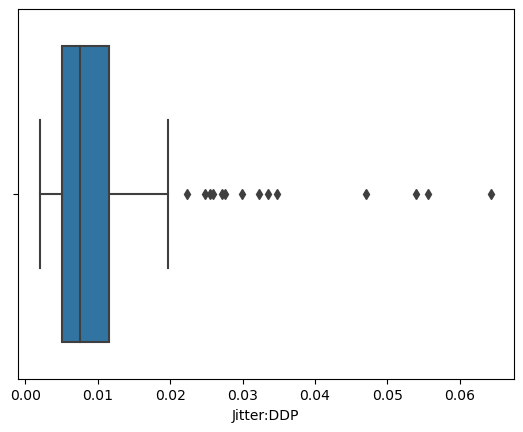

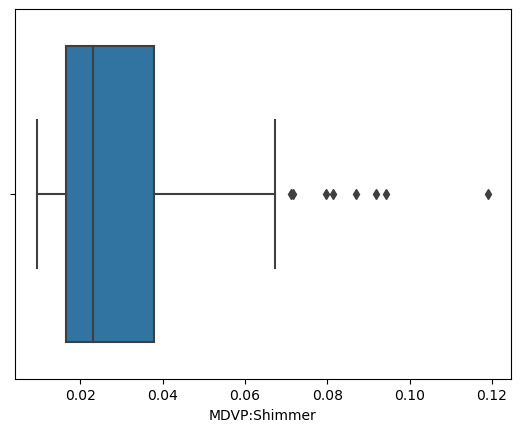

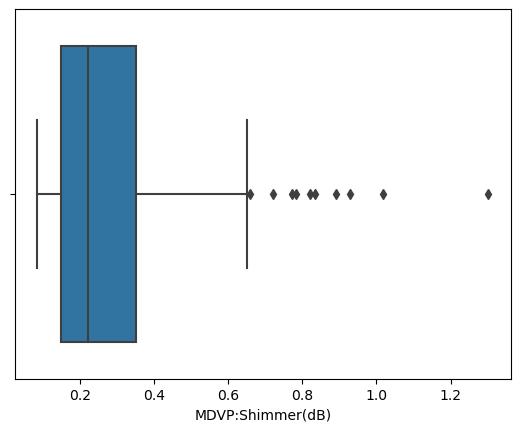

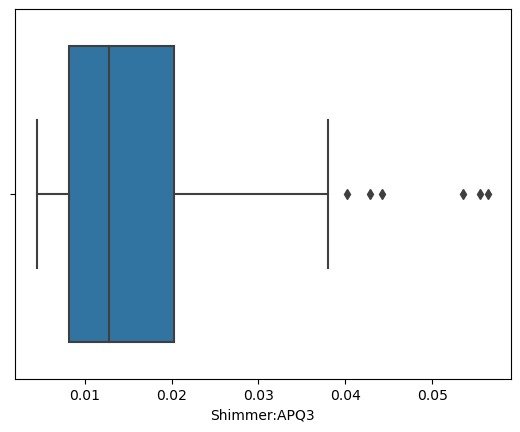

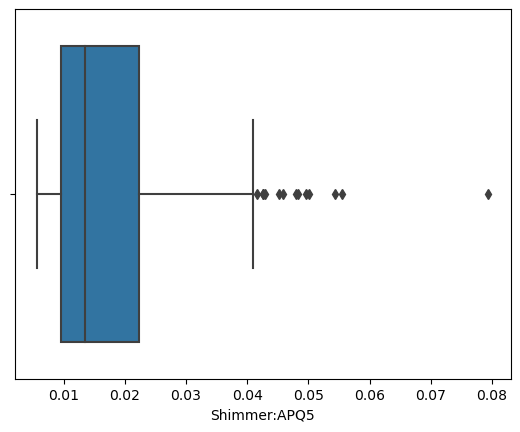

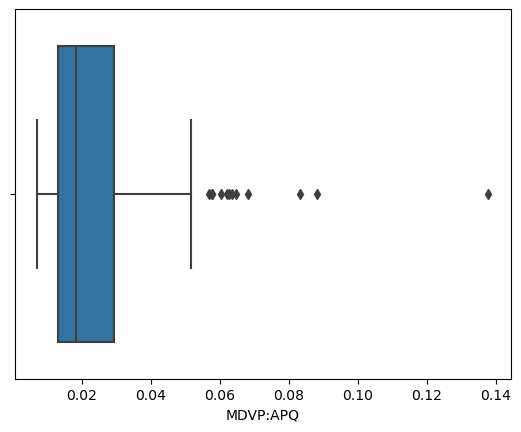

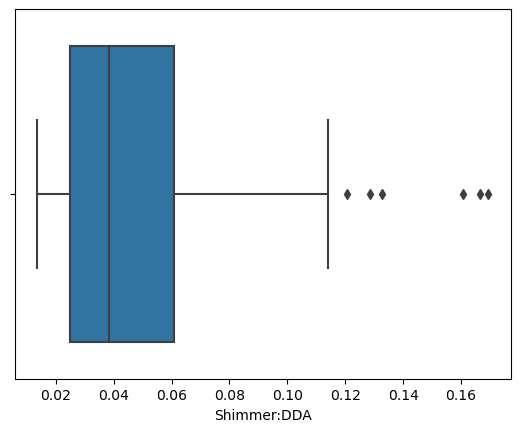

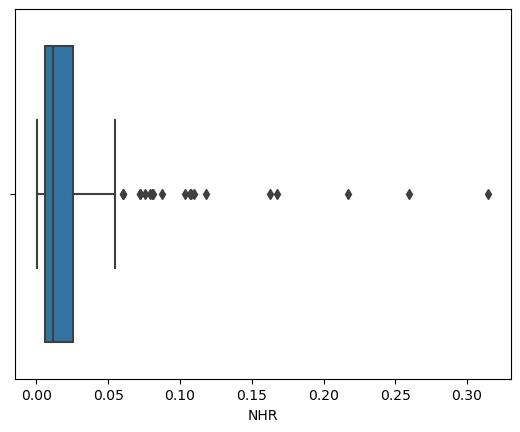

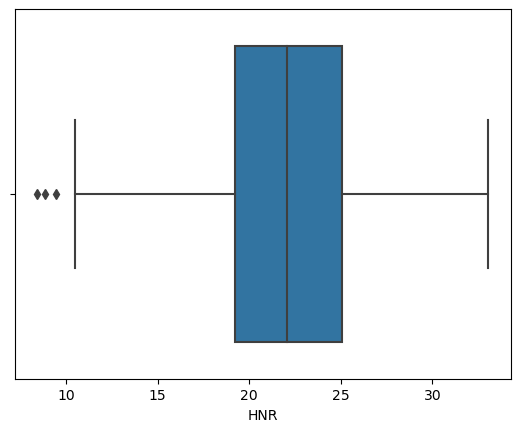

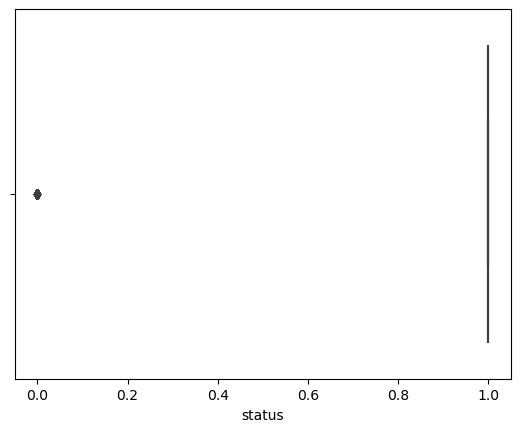

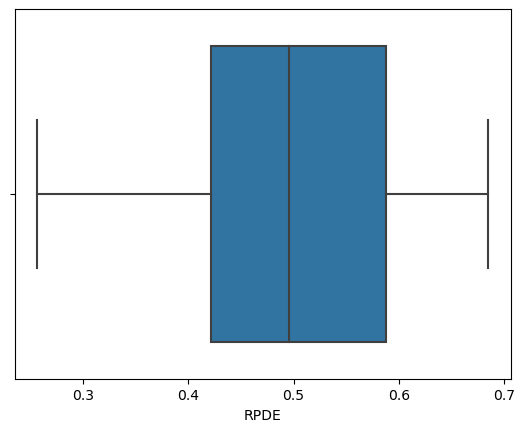

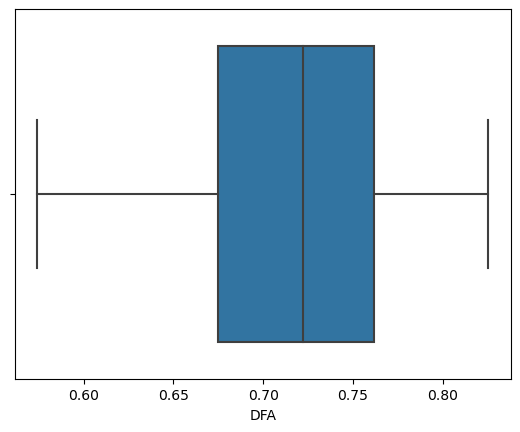

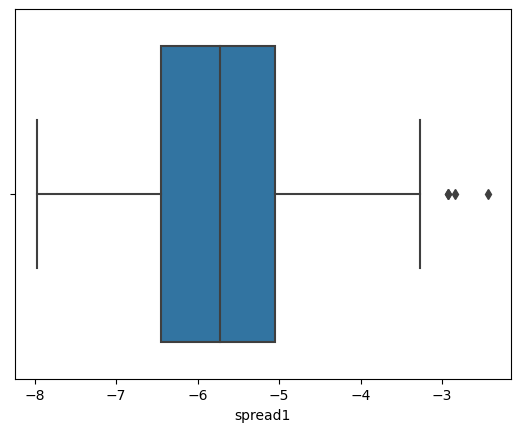

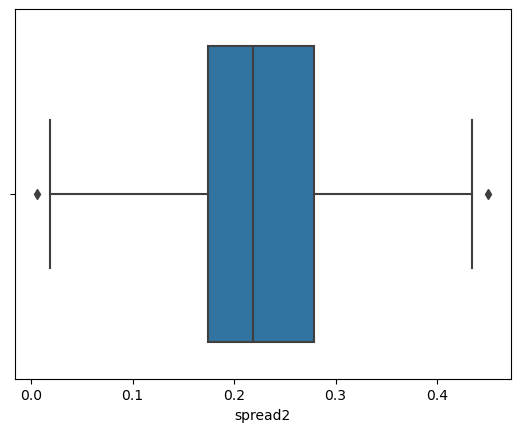

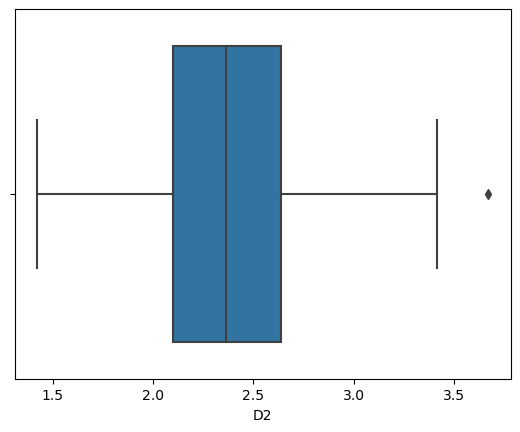

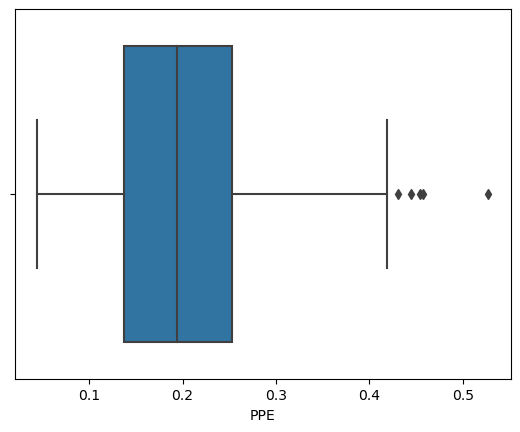

In [11]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

<AxesSubplot:>

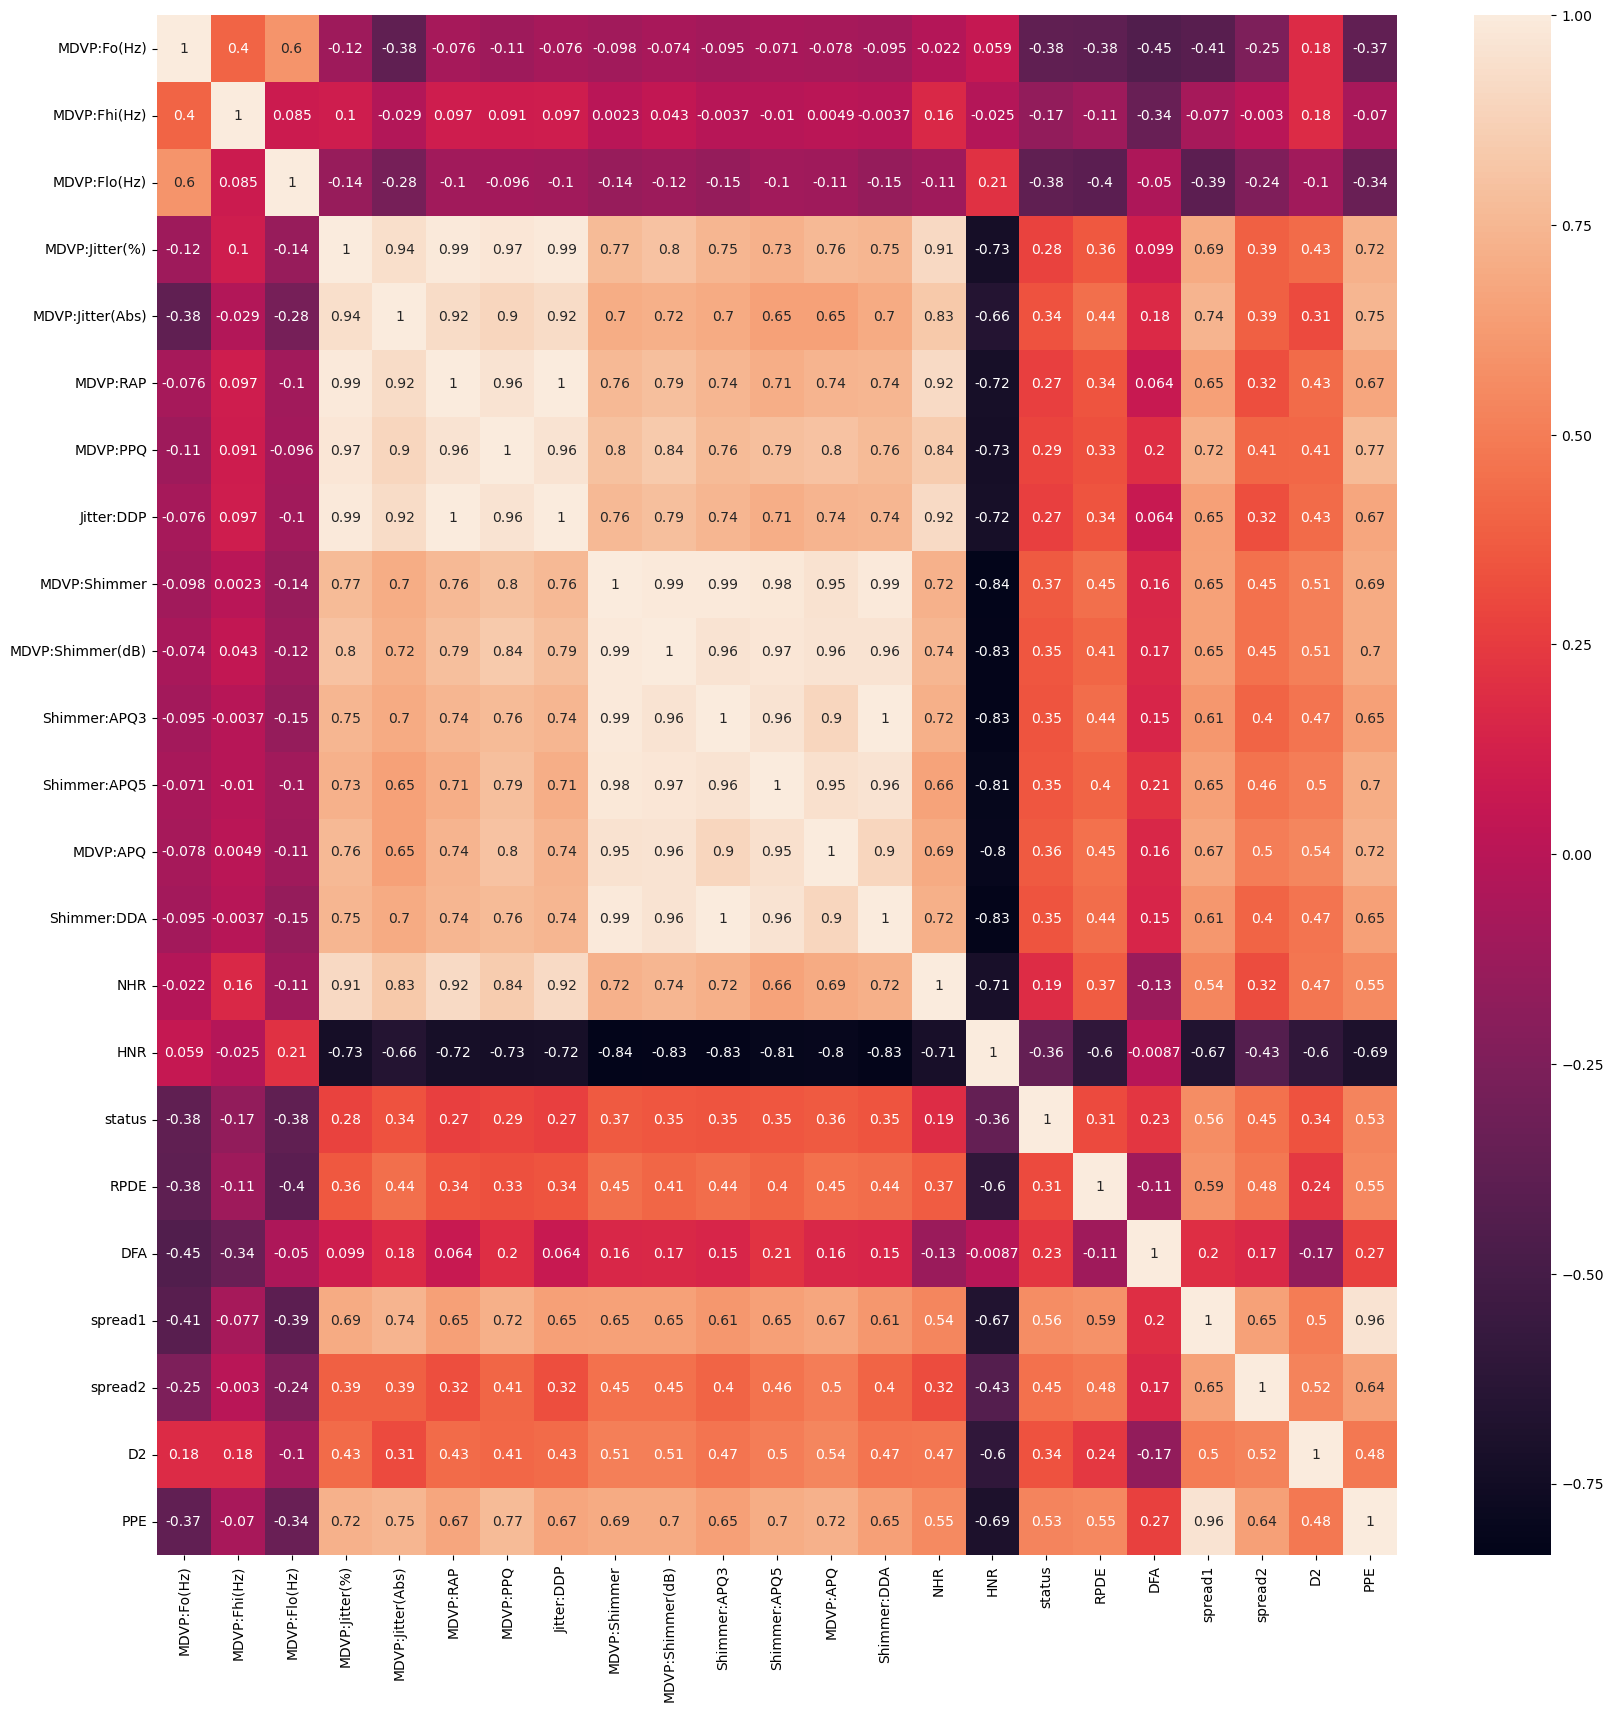

In [12]:
plt.figure(figsize=(20,20))
corr= df.corr()
sns.heatmap(corr,annot=True )


In [13]:
x= df.drop(['status','name'],axis=1)
y=df['status']

In [14]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
ros = RandomOverSampler()

X_ros, y_ros= ros.fit_resample(x,y)
print(Counter(y_ros))

In [ ]:
scaler= MinMaxScaler((-1,1))
x= scaler.fit_transform(X_ros)
y= y_ros

In [ ]:
from sklearn.decomposition import PCA

pca= PCA(.95)
X_PCA= pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X_PCA, y, test_size=0.2, random_state=7)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score

list_met=[]
list_accuracy=[]

from sklearn.linear_model import LogisticRegression

classifier= LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr= classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
accuracy_LR= accuracy_score(y_test, y_pred)

from sklearn.tree import DecisionTreeClassifier

classifier2= DecisionTreeClassifier(random_state=14)
dt= classifier2.fit(x_train, y_train)
y_pred2= classifier2.predict(x_test)
accuracy_DT= accuracy_score(y_test, y_pred2)

from sklearn.ensemble import RandomForestClassifier

classifier3= RandomForestClassifier(random_state=14)
rfi= classifier3.fit(x_train, y_train)
y_pred3= classifier3.predict(x_test)
accuracy_RFI= accuracy_score(y_test, y_pred3)

from sklearn.ensemble import RandomForestClassifier

classifier4= RandomForestClassifier(criterion='entropy')
rfe= classifier4.fit(x_train, y_train)
y_pred4= classifier4.predict(x_test)
accuracy_RFE= accuracy_score(y_test, y_pred4)

from sklearn.svm import SVC
model_svm= SVC(cache_size=100)
svm=model_svm.fit(x_train, y_train)
y_pred5= model_svm.predict(x_test)
accuracy_svc= accuracy_score(y_test, y_pred5)

from sklearn.neighbors import KNeighborsClassifier
model_knn3= KNeighborsClassifier(n_neighbors=3)
knn= model_knn3.fit(x_train, y_train)
pred_knn3= model_knn3.predict(x_test)
accuracy_SVM= accuracy_score(y_test, pred_knn3)

from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb= gnb.fit(x_train,y_train)
pred_gnb= gnb.predict(x_test)
accuracy_GNB= accuracy_score(y_test, pred_gnb)

from sklearn.naive_bayes import BernoulliNB
model= BernoulliNB()
bnb= model.fit(x_train,y_train)
pred_bnb= model.predict(x_test)
accuracy_BNB= accuracy_score(y_test, pred_bnb)

from sklearn.ensemble import VotingClassifier

evc= VotingClassifier(estimators=[('lr',lr), ('rfi',rfi),('rfe',rfe),('DT',dt),('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)], voting='hard',flatten_transform=True)

model_evc= evc.fit(x_train,y_train)
pred_evc= evc.predict(x_test)
accuracy_evc= accuracy_score(y_test,pred_gnb)

list1=["Logistic Regression",'Decision Tree', 'Random Forest(IG)', 'Random Forest(entropy)', 'SVM','KNN','gnb','bnb','voting classifier']
list2= [accuracy_LR, accuracy_DT, accuracy_RFI, accuracy_RFE, accuracy_svc, accuracy_SVM, accuracy_GNB, accuracy_BNB, accuracy_evc]
list3= [classifier, classifier2,classifier3, classifier4, model_svm, model_knn3, gnb, model]

df_Accuracy= pd.DataFrame({'Method Used': list1, 'Accuracy': list2})
print(df_Accuracy)

chart= sns.barplot(x='Method Used', y='Accuracy', data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)




In [ ]:
model_xg= XGBClassifier()
model_xg.fit(x_train, y_train)

In [ ]:
y_pred= model_xg.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, model_xg.predict(x_test))

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, model_xg.predict(x_test),average='binary')

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test, model_xg.predict(x_test)))
print("Confusion Matrix")
print(cm)

In [ ]:
for i in list3:
    print('#############################################',i, "######################################")
    print(classification_report(y_test, i.predict(x_test)))
    print('confusion matrix')
    print(cm)
    print()

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
probabilities= model.predict_proba(np.array(x_test))
predictions= probabilities
fpr,tpr,threshold= roc_curve(y_test, predictions[:,1])
roc_auc= auc(fpr,tpr)

plt.title('Receiver operating characteristic')
plt.plot(fpr,tpr,'b',label='AUC= %0.2f' %roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

#plot_roc(model_xg, x_test, y_test)